# Project 1

#### import statements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## What are the 5 most popular trips that you would call "commuter" trips?

##### "Commuter" trips should be relatively consistent as these commuters have a regular schedule (work, school, etc.) Subscribers are consistent users of Lyft BayWheels as they pay for a monthly or yearly membership, thus making them prime candidates for analyzing "commuter" trips

##### Afternoons and mornings make up the two most common subscriber trips

(A)

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(*) AS count, CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str FROM `my-first-project-287722.bike_trip_data.bikeshare_trips` WHERE subscriber_type="Subscriber" GROUP BY start_hour_str ORDER BY count DESC' > sub_besttime.csv

Waiting on bqjob_r52d8301772abe107_00000174e80f978b_1 ... (0s) Current status: DONE   


In [3]:
sub_besttime = pd.read_csv("sub_besttime.csv")
sub_besttime.head()

,count,start_hour_str
0,226228,Afternoon
1,211691,Morning
2,135986,Early Afternoon
3,124078,Mid Morning
4,94766,Mid Day


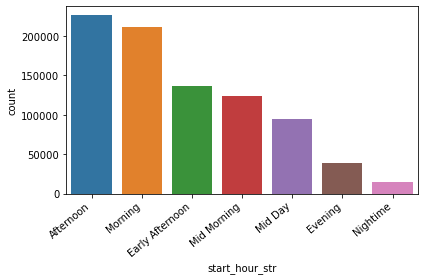

In [4]:
ax = sns.barplot(x='start_hour_str', y='count', data=sub_besttime)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### The 5 most popular starting stations for subscribers for morning/afternoon trips are:

```
San Francisco Caltrain (Townsend at 4th)
San Francisco Caltrain 2 (330 Townsend)
Temporary Transbay Terminal (Howard at Beale)
Harry Bridges Plaza (Ferry Building)
Steuart at Market
```

(B)

In [5]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(*) AS count, start_station_name FROM `my-first-project-287722.bike_trip_data.bikeshare_trips` WHERE subscriber_type = "Subscriber" AND ((EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8) OR (EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19) ) GROUP BY start_station_name, subscriber_type ORDER BY count DESC LIMIT 5'

Waiting on bqjob_r797751147b9190c9_00000174e80fa156_1 ... (0s) Current status: DONE   
+-------+-----------------------------------------------+
| count |              start_station_name               |
+-------+-----------------------------------------------+
| 47754 | San Francisco Caltrain (Townsend at 4th)      |
| 31903 | San Francisco Caltrain 2 (330 Townsend)       |
| 23696 | Temporary Transbay Terminal (Howard at Beale) |
| 22107 | Harry Bridges Plaza (Ferry Building)          |
| 17941 | Steuart at Market                             |
+-------+-----------------------------------------------+


##### Answer: The 5 most popular "commuter" trips would have to be a morning or afternoon trip from one of these stations:

```
1. San Francisco Caltrain (Townsend at 4th)
2. San Francisco Caltrain 2 (330 Townsend)
3. Temporary Transbay Terminal (Howard at Beale)
4. Harry Bridges Plaza (Ferry Building)
5. Steuart at Market
```

## Recommendations based on findings

##### On average, a subscriber's trip takes less than 10 minutes

(C)

In [6]:
! bq query --use_legacy_sql=FALSE 'SELECT avg(duration_sec/60) AS avg_duration_min, CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE subscriber_type = "Subscriber" GROUP BY start_hour_str, subscriber_type'

Waiting on bqjob_r317f4e3268291d2c_00000174e80fa828_1 ... (0s) Current status: DONE   
+-------------------+-----------------+
| avg_duration_min  | start_hour_str  |
+-------------------+-----------------+
| 9.798219716392616 | Afternoon       |
| 9.717589641854733 | Mid Day         |
| 9.267532482308232 | Nightime        |
|  9.87304649007978 | Early Afternoon |
| 9.449355647254128 | Mid Morning     |
| 9.783906341117099 | Evening         |
| 9.688156952035248 | Morning         |
+-------------------+-----------------+


##### Whereas, a customer's (no monthly or yearly subscription)) trip takes well over 40 minutes. However, afternoon riders have an average trip time under 45 minutes which is the cutoff before additional prices are added to your total costs.

(D)

In [7]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT avg(duration_sec/60) AS avg_duration_min, CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE subscriber_type = "Customer" GROUP BY start_hour_str, subscriber_type' > avg_durationmin_customer.csv

Waiting on bqjob_ra0d488a76fe9bfb_00000174e80faf51_1 ... (0s) Current status: DONE   


In [8]:
avg_durationmin_customer = pd.read_csv("avg_durationmin_customer.csv")
avg_durationmin_customer.head()

,avg_duration_min,start_hour_str
0,42.372552,Afternoon
1,75.314749,Mid Morning
2,68.495105,Mid Day
3,85.238378,Evening
4,55.694316,Early Afternoon


### Recommendation 1:
Single ride caps at 30 minutes and charge additional fees every 15 minutes.

For customers without a subscription, I would recommend advertising monthly memberships that highlight the unlimited amount of 45-minute rides or at least an access pass that offers unlimited amount of 45-minute rides for a day. This can potentially lead to new subscribers.

___

##### We also find that Early Afternoon and Mid Day are the most popular times for customers

(E)

In [9]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(*) AS count, CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str FROM `my-first-project-287722.bike_trip_data.bikeshare_trips` WHERE subscriber_type="Customer" GROUP BY start_hour_str ORDER BY count DESC' > cust_besttime.csv

Waiting on bqjob_r6f7f3fbc6314bfac_00000174e80fb6a3_1 ... (0s) Current status: DONE   


In [10]:
cust_besttime = pd.read_csv("cust_besttime.csv")
cust_besttime.head(2)

,count,start_hour_str
0,38247,Early Afternoon
1,36305,Mid Day


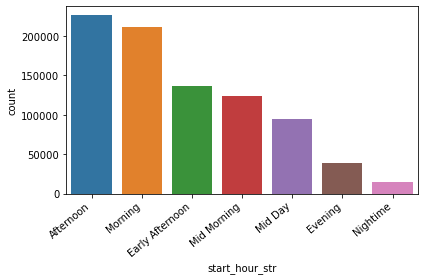

In [11]:
ax = sns.barplot(x='start_hour_str', y='count', data=sub_besttime)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### Considering the 5 most popular starting stations for customers for mid day/early afternoon trips are:

```
Embarcadero at Sansome
Harry Bridges Plaza (Ferry Building)
Embarcadero at Vallejo
Market at 4th
Powell Street BART 
```

(F)

In [12]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(*) AS count, start_station_name FROM `my-first-project-287722.bike_trip_data.bikeshare_trips` WHERE subscriber_type = "Customer" AND ((EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13) OR (EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16) ) GROUP BY start_station_name, subscriber_type ORDER BY count DESC' > pop_stations_mid_earlyaft.csv

Waiting on bqjob_r78813c5dd3aa3724_00000174e80fbe31_1 ... (0s) Current status: DONE   


In [13]:
pop_stations_mid_earlyaft = pd.read_csv("pop_stations_mid_earlyaft.csv")
pop_stations_mid_earlyaft.head()

,count,start_station_name
0,8411,Embarcadero at Sansome
1,7568,Harry Bridges Plaza (Ferry Building)
2,3175,Embarcadero at Vallejo
3,3131,Market at 4th
4,2712,Powell Street BART


(G)

In [14]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT stations.name, avg(status.bikes_available) AS bike_availability FROM `my-first-project-287722.bike_trip_data.bikeshare_status` status LEFT JOIN `my-first-project-287722.bike_trip_data.bikeshare_stations` stations ON status.station_id = stations.station_id AND ((EXTRACT(HOUR FROM status.time) >= 11 AND EXTRACT(HOUR FROM status.time) <= 13) OR (EXTRACT(HOUR FROM status.time) >= 14 AND EXTRACT(HOUR FROM status.time) <= 16)) GROUP BY stations.name ORDER BY bike_availability DESC' > mid_earlyaft_availability.csv


Waiting on bqjob_r318debe5ec918d56_00000174e80fc4ed_1 ... (0s) Current status: DONE   


##### Harry Bridges Plaza (Ferry Building) Ranks 16th in bike availability when it is the 2nd most common customer trip during mid day/early afternoon.

In [15]:
mid_earlyaft_availability = pd.read_csv("mid_earlyaft_availability.csv")
mid_earlyaft_availability[mid_earlyaft_availability['name'] == "Harry Bridges Plaza (Ferry Building)"]



,name,bike_availability
15,Harry Bridges Plaza (Ferry Building),9.475297


In [16]:
pop_stations_mid_earlyaft[pop_stations_mid_earlyaft['start_station_name'] == "Harry Bridges Plaza (Ferry Building)"]


,count,start_station_name
1,7568,Harry Bridges Plaza (Ferry Building)


##### Embarcadero at Sansome Ranks 20th in bike availability when it is the 1st most common customer trip during mid day/early afternoon.

In [17]:
mid_earlyaft_availability[mid_earlyaft_availability['name'] == "Embarcadero at Sansome"]


,name,bike_availability
20,Embarcadero at Sansome,8.864457


In [18]:
pop_stations_mid_earlyaft[pop_stations_mid_earlyaft['start_station_name'] == "Embarcadero at Sansome"]


,count,start_station_name
0,8411,Embarcadero at Sansome


##### On the other hand, Market at Sansome has the most available bikes, but is only the 9th popular station for customer trips.

In [19]:
mid_earlyaft_availability[mid_earlyaft_availability['name'] == 'Market at Sansome']

,name,bike_availability
0,Market at Sansome,13.394439


In [20]:
pop_stations_mid_earlyaft[pop_stations_mid_earlyaft['start_station_name'] == 'Market at Sansome']

,count,start_station_name
8,2183,Market at Sansome


### Recommendation 2:

There is a somewhat inverse relationship between bike availability and station popularity for the mid day/early afternoon hours. It may be more profitable to offer more bikes at the more popular stations, while cutting costs by offering less bikes at less popular stations. Basically, moving bikes where there is higher demand.

__________________________

##### These are the most prominent customer trips that happen during the weekend.

##### About 35 - 55 minutes in mid day/early afternoon at Embarcadero at Sansome, Harry Bridges Plaza (Ferry Building), 2nd at Townsend.

(H)

In [21]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(*) AS count, avg(duration_sec/60) AS avg_min, start_station_name, CASE WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime" WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning" WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning" WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day" WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon" WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening" END AS start_hour_str FROM `my-first-project-287722.bike_trip_data.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) GROUP BY start_station_name, start_hour_str ORDER BY count DESC' > cust_trip_weekend.csv

Waiting on bqjob_r350f5f5eeed54df3_00000174e80fcc0b_1 ... (0s) Current status: DONE   


In [22]:
cust_trip_weekend = pd.read_csv("cust_trip_weekend.csv")
cust_trip_weekend.head()

,count,avg_min,start_station_name,start_hour_str
0,2995,40.426388,Embarcadero at Sansome,Early Afternoon
1,2808,54.157425,Harry Bridges Plaza (Ferry Building),Mid Day
2,2510,45.275000,Harry Bridges Plaza (Ferry Building),Early Afternoon
3,2196,44.550258,Embarcadero at Sansome,Mid Day
4,1875,26.243307,Embarcadero at Sansome,Afternoon


##### Early Afternoon, Mid Day, and Mid Morning trips have higher trip durations (in minutes) on average than compared to afternoon, evening, and morning trips.

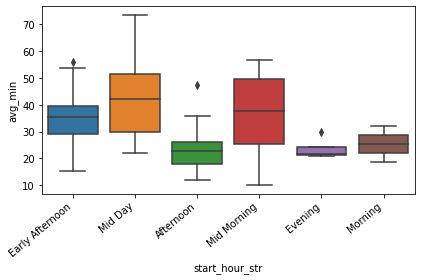

In [23]:
ax = sns.boxplot(x='start_hour_str', y='avg_min', data=cust_trip_weekend)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Recommendation 3:

It looks like most customer trips on the weekends take on average 35 - 55 minutes. The current offer for an access pass or monthly/yearly subscription has a cap for 45 minutes.

From 9AM-4PM (Mid Morning, Mid Day, Early Afternoon) We recommend giving a similar offer (access pass) that extends this cap to 1 hour at the same price or offer a discounted rate for each 15 minutes after 45 minutes in order to attract more potential customers looking to bike on the weekends.

____________________

# Conclusions

#### The 5 most popular "commuter" trips would have to be a morning or afternoon trip from one of these stations:¶
1. San Francisco Caltrain (Townsend at 4th)
2. San Francisco Caltrain 2 (330 Townsend)
3. Temporary Transbay Terminal (Howard at Beale)
4. Harry Bridges Plaza (Ferry Building)
5. Steuart at Market

#### Recommendations List:
1. Single ride caps at 30 minutes and charge additional fees every 15 minutes. For customers without a subscription, I would recommend advertising monthly memberships that highlight the unlimited amount of 45-minute rides or at least an access pass that offers unlimited amount of 45-minute rides for a day. This can potentially lead to new subscribers.

2. There is a somewhat inverse relationship between bike availability and station popularity for the mid day/early afternoon hours. It may be more profitable to offer more bikes at the more popular stations, while cutting costs by offering less bikes at less popular stations. Basically, moving bikes where there is higher demand.

3. It looks like most customer trips on the weekends take on average 35 - 55 minutes. The current offer for an access pass or monthly/yearly subscription has a cap for 45 minutes. From 9AM-4PM (Mid Morning, Mid Day, Early Afternoon) We recommend giving a similar offer (access pass) that extends this cap to 1 hour at the same price or offer a discounted rate for each 15 minutes after 45 minutes in order to attract more potential customers looking to bike on the weekends.

# Appendix

(A) 

```sql
#standardSQL
SELECT COUNT(*) AS count,
    CASE 
        WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
        WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
        WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
        END AS start_hour_str
FROM `my-first-project-287722.bike_trip_data.bikeshare_trips`
WHERE subscriber_type="Subscriber"
GROUP BY start_hour_str
ORDER BY count DESC
```

(B)
```sql
#standardSQL
SELECT COUNT(*) AS count, start_station_name
FROM `my-first-project-287722.bike_trip_data.bikeshare_trips`
WHERE subscriber_type = "Subscriber" AND ((EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8) OR (EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19) )
GROUP BY start_station_name, subscriber_type
ORDER BY count DESC LIMIT 5
```

(C)
```sql
#standardSQL
SELECT avg(duration_sec/60) AS avg_duration_min,
    CASE
        WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
        WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
        WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
        END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber"
GROUP BY start_hour_str, subscriber_type
```

(D)
```sql
#standardSQL
SELECT avg(duration_sec/60) AS avg_duration_min,
    CASE
        WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
        WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
        WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
        END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Customer"
GROUP BY start_hour_str, subscriber_type
```

(E)
```sql
#standardSQL
SELECT COUNT(*) AS count,
    CASE
        WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
        WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
        WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
        WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
        WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
        END AS start_hour_str
FROM `my-first-project-287722.bike_trip_data.bikeshare_trips`
WHERE subscriber_type="Customer"
GROUP BY start_hour_str
ORDER BY count DESC
```

(F)
```sql
#standardSQL
SELECT COUNT(*) AS count, start_station_name
FROM `my-first-project-287722.bike_trip_data.bikeshare_trips`
WHERE subscriber_type = "Customer" AND ((EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13) OR (EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16) )
GROUP BY start_station_name, subscriber_type
ORDER BY count DESC
```

(G)
```sql
#standardSQL
SELECT stations.name, avg(status.bikes_available) AS bike_availability
FROM `my-first-project-287722.bike_trip_data.bikeshare_status` status
LEFT JOIN `my-first-project-287722.bike_trip_data.bikeshare_stations` stations ON status.station_id = stations.station_id AND ((EXTRACT(HOUR FROM status.time) >= 11 AND EXTRACT(HOUR FROM status.time) <= 13) OR (EXTRACT(HOUR FROM status.time) >= 14 AND EXTRACT(HOUR FROM status.time) <= 16))
GROUP BY stations.name
ORDER BY bike_availability DESC
```


(H)
```sql
#standardSQL
SELECT COUNT(*) AS count,
       avg(duration_sec/60) AS avg_min,
       start_station_name,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `my-first-project-287722.bike_trip_data.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) AND
      ((EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13) OR
      (EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16))
GROUP BY start_station_name, start_hour_str
ORDER BY count DESC
```